In [ ]:
import pandas as pd
import numpy as np

# Crear dataset simulado
np.random.seed(42)
n = 200

data = pd.DataFrame({
    'nota_final': np.random.normal(70, 12, n),
    'horas_estudio': np.random.normal(15, 5, n),
    'asistencia': np.random.normal(85, 10, n),
    'genero': np.random.choice(['Hombre', 'Mujer'], n),
    'nivel_educativo': np.random.choice(['Bachiller', 'Universidad', 'Master'], n, p=[0.4, 0.4, 0.2]),
    'metodo_estudio': np.random.choice(['Visual', 'Auditivo', 'Kinestésico'], n),
    'aprobado': np.random.choice([0, 1], n, p=[0.3, 0.7])
})

# Crear relaciones artificiales
data.loc[data['nivel_educativo'] == 'Master', 'nota_final'] += 8
data.loc[data['nivel_educativo'] == 'Universidad', 'nota_final'] += 2
data['horas_estudio'] = data['nota_final'] * 0.2 + np.random.normal(0, 3, n)

In [2]:
from scipy.stats import ttest_ind, f_oneway, chi2_contingency, spearmanr

Horas vs nota final

Correlación Pearson:
               horas_estudio  nota_final
horas_estudio       1.000000    0.591248
nota_final          0.591248    1.000000

Correlación Spearman:
               horas_estudio  nota_final
horas_estudio       1.000000    0.576833
nota_final          0.576833    1.000000


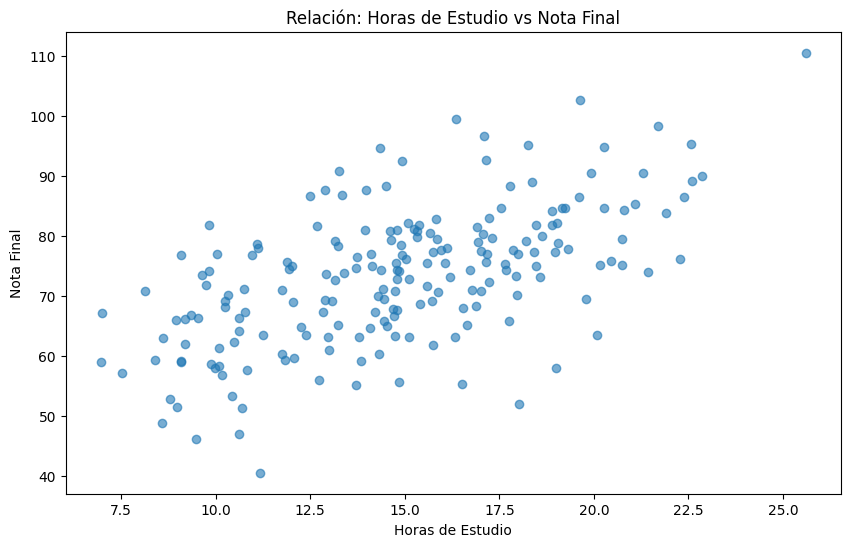

In [3]:
import matplotlib.pyplot as plt

# 1. Calcula la correlación de Pearson
corr_pearson = data[['horas_estudio', 'nota_final']].corr(method='pearson')
print("Correlación Pearson:")
print(corr_pearson)

# 2. Calcula la correlación de Spearman  
corr_spearman = data[['horas_estudio', 'nota_final']].corr(method='spearman')
print("\nCorrelación Spearman:")
print(corr_spearman)

# 3. Visualiza con scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['horas_estudio'], data['nota_final'], alpha=0.6)
plt.xlabel('Horas de Estudio')
plt.ylabel('Nota Final')
plt.title('Relación: Horas de Estudio vs Nota Final')
plt.show()

Diferencia nota hombres y mujeres

t-statistic: 0.754
p-value: 0.4520
❌ No hay diferencia significativa


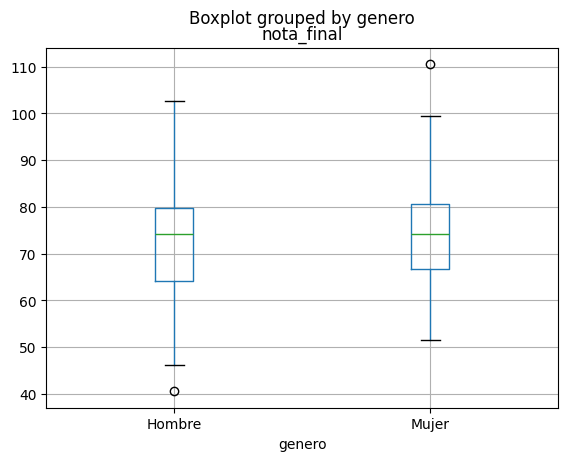

In [ ]:
# 1. Separa los grupos
hombres = data[data['genero'] == 'Hombre']['nota_final']
mujeres = data[data['genero'] == 'Mujer']['nota_final']

# 2. Aplica test t
t_stat, p_value = ttest_ind(mujeres, hombres)  # Mujeres vs Hombres
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")

# 3. Interpreta
if p_value < 0.05:
    if t_stat > 0:
        print("Las mujeres tienen notas significativamente MAYORES")
    else:
        print("Los hombres tienen notas significativamente MAYORES")
else:
    print("No hay diferencia significativa")

# 4. Visualiza con boxplot
data.boxplot(column='nota_final', by='genero')
plt.show()

Diferencia nota niveles educativos

F-statistic: 6.496
p-value: 0.0019
✅ Hay diferencias significativas entre al menos un par de grupos


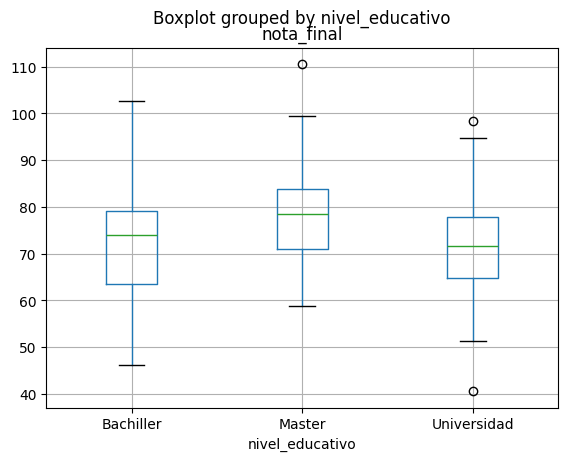

In [ ]:
# 1. Separa los grupos
bachiller = data[data['nivel_educativo'] == 'Bachiller']['nota_final']
universidad = data[data['nivel_educativo'] == 'Universidad']['nota_final'] 
master = data[data['nivel_educativo'] == 'Master']['nota_final']

# 2. Aplica ANOVA
f_stat, p_value = f_oneway(bachiller, universidad, master)
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.4f}")

# 3. Interpreta
if p_value < 0.05:
    print("Hay diferencias significativas entre al menos un par de grupos")
else:
    print("No hay diferencias significativas")

# 4. Visualiza
data.boxplot(column='nota_final', by='nivel_educativo')
plt.show()

Relacion entre metodo de estudio y probabilidad de aprobar

In [8]:
# 1. Crea variable aprobado basada en nota
data['aprobado'] = (data['nota_final'] >= 5).astype(int)

# 2. Tabla de contingencia: método vs aprobado
tabla = pd.crosstab(data['metodo_estudio'], data['aprobado'])
print("Tabla Método de Estudio vs Aprobado:")
print(tabla)

# 3. Porcentajes de aprobado por método
porcentajes = tabla.div(tabla.sum(axis=1), axis=0) * 100
print("\nPorcentajes de aprobado por método:")
print(porcentajes)

# 4. Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(tabla)
print(f"\nChi-cuadrado: {chi2:.3f}")
print(f"p-value: {p_value:.4f}")

# 5. Interpreta
if p_value < 0.05:
    print("Existe relación entre método de estudio y aprobado")
    
    # Encuentra método con mayor tasa de aprobado
    mejor_metodo = porcentajes[1].idxmax()
    print(f"Mejor método: {mejor_metodo} ({porcentajes.loc[mejor_metodo, 1]:.1f}% de aprobados)")
else:
    print("No existe relación significativa")

Tabla Método de Estudio vs Aprobado:
aprobado         1
metodo_estudio    
Auditivo        65
Kinestésico     65
Visual          70

Porcentajes de aprobado por método:
aprobado            1
metodo_estudio       
Auditivo        100.0
Kinestésico     100.0
Visual          100.0

Chi-cuadrado: 0.000
p-value: 1.0000
No existe relación significativa


Estudiantes que aprueban mejor asistencia

Asistencia media aprobados: 84.1%
Asistencia media suspensos: nan%

t-statistic: nan
p-value: nan
No hay diferencia significativa en asistencia


c:\Master Analitica de Datos Uniovi\master-analitica-datos-intro-a-python\venv\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


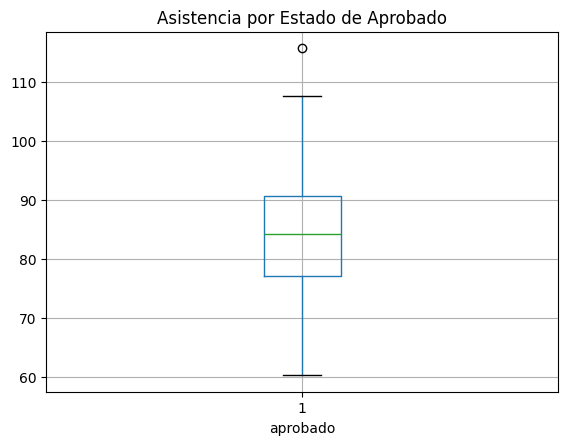

In [ ]:
# 1. Separa grupos
aprobados = data[data['aprobado'] == 1]['asistencia']
suspensos = data[data['aprobado'] == 0]['asistencia']

print(f"Asistencia media aprobados: {aprobados.mean():.1f}%")
print(f"Asistencia media suspensos: {suspensos.mean():.1f}%")

# 2. Test t
t_stat, p_value = ttest_ind(aprobados, suspensos)
print(f"\nt-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")

# 3. Interpreta
if p_value < 0.05:
    if t_stat > 0:
        print("Los aprobados tienen asistencia significativamente MAYOR")
        print(f"Diferencia: {aprobados.mean() - suspensos.mean():.1f}%")
    else:
        print("Los suspensos tienen asistencia significativamente MAYOR")
else:
    print("No hay diferencia significativa en asistencia")

# 4. Visualizar
data.boxplot(column='asistencia', by='aprobado')
plt.suptitle('')  # Elimina título automático
plt.title('Asistencia por Estado de Aprobado')
plt.show()